✅ Saved: plots/Gemma_Accuracy.png
✅ Saved: plots/Gemma_F1.png
✅ Saved: plots/Gemma_LogLoss.png


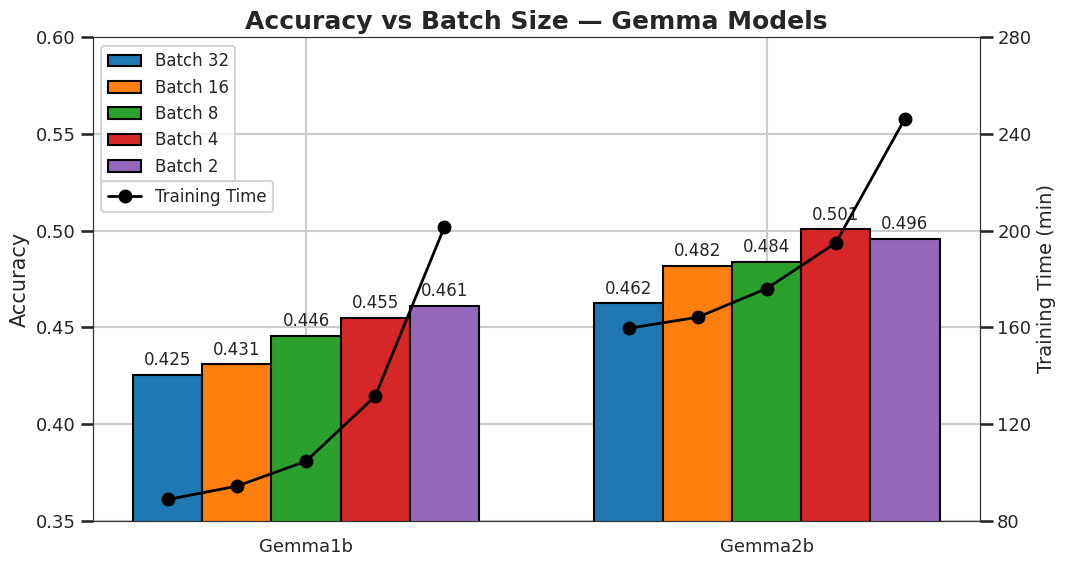

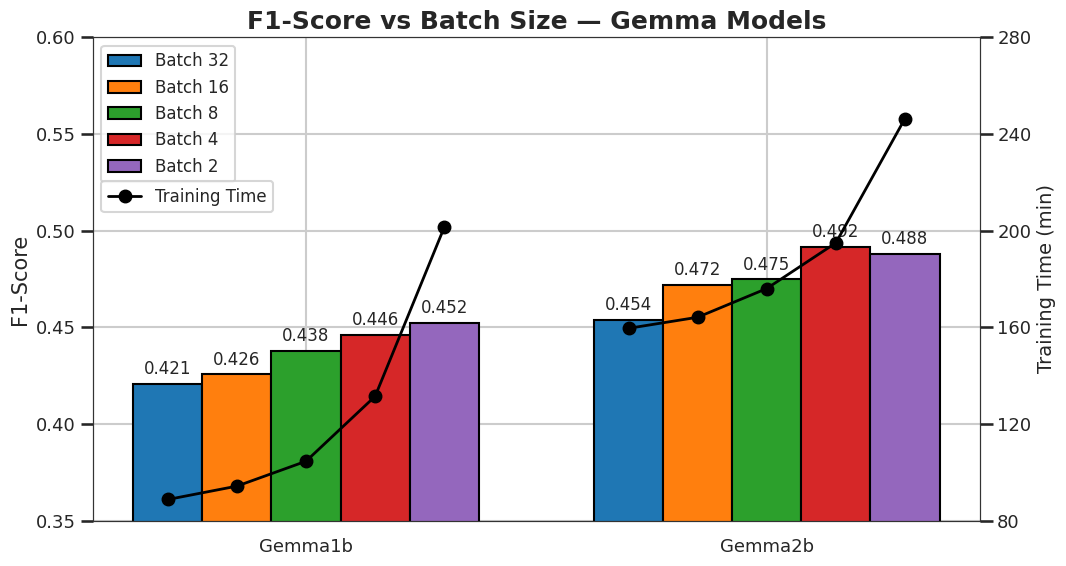

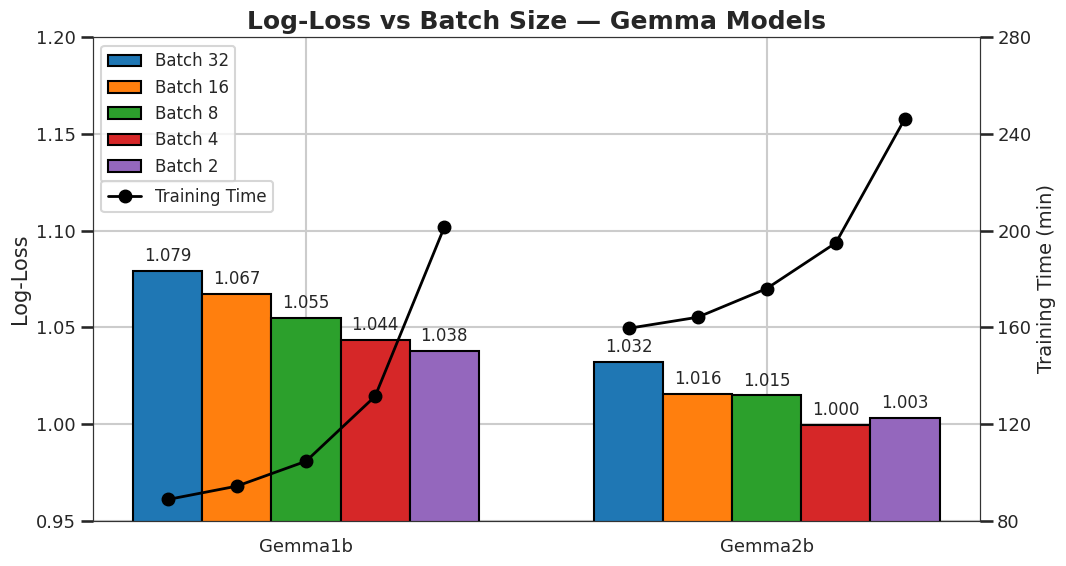

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load CSV ===
df = pd.read_csv("metrics_gemma.csv")

# Convert Time → minutes
df["Time"] = df["Time"] / 60.0  

# === 2. Output folder ===
os.makedirs("plots", exist_ok=True)

# === 3. Global style ===
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "axes.edgecolor": "#333333",
    "axes.linewidth": 0.8,
    "axes.titlesize": 18,
    "axes.labelsize": 15,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13
})

# === 4. Plot Function ===
def plot_metric(metric_name, ylabel, save_name):

    models = ["Gemma1b", "Gemma2b"]
    batch_order = [32, 16, 8, 4, 2]
    bar_width = 0.15

    fig, ax1 = plt.subplots(figsize=(11, 6))

    # X positions: one center per model group
    x = range(len(models))

    # Colors for each batch size
    colors = {
        32: "#1f77b4",
        16:  "#ff7f0e",
        8:  "#2ca02c",
        4:  "#d62728",
        2: "#9467bd",
    }

    # === Bars for each batch size ===
    for i, batch in enumerate(batch_order):
        offsets = [xi + (i - (len(batch_order) - 1) / 2) * bar_width for xi in x]
        vals = [
            df[(df["Model"] == m) & (df["BatchSize"] == batch)][metric_name].values[0]
            for m in models
        ]

        ax1.bar(offsets, vals, width=bar_width, color=colors[batch],
                edgecolor="black", label=f"Batch {batch}")

        # label on bars
        for ox, v in zip(offsets, vals):
            ax1.text(ox, v + 0.003, f"{v:.3f}", ha="center", va="bottom", fontsize=12)

    ax1.set_xticks(x)
    ax1.set_xticklabels(models)
    ax1.set_ylabel(ylabel)
    ax1.set_title(f"{metric_name} vs Batch Size — Gemma Models", weight="bold")

    # === Set y-axis range for metric (optional) ===
    if metric_name in ["Accuracy", "F1-Score"]:
        ax1.set_ylim(0.35, 0.60)
    elif metric_name == "Log-Loss":
        ax1.set_ylim(0.95, 1.20)
        
    # === Secondary Axis: Training Time ===
    ax2 = ax1.twinx()
    ax2.grid(False)

    # time_vals[model][batch] → time in minutes
    time_vals = [
        [df[(df["Model"] == m) & (df["BatchSize"] == b)]["Time"].values[0]
         for b in batch_order]
        for m in models
    ]

    # === Plot one polyline per model ===
    for i, m in enumerate(models):
        center = (len(batch_order) - 1) / 2     # center alignment for 3 bars
        x_offsets = [i + (j - center) * bar_width 
                     for j in range(len(batch_order))]

        label = "Training Time" if i == 0 else None
        ax2.plot(
            x_offsets,
            time_vals[i],
            marker="o",
            linewidth=2,
            color="black",
            label=label
        )

    ax2.set_ylabel("Training Time (min)", fontsize=14)

    # === Set y-axis range for time ===
    ax2.set_yticks(range(80, 290, 40))
    
    # legends
    ax1.legend(loc="upper left", bbox_to_anchor=(0, 1.00), fontsize=12)
    ax2.legend(loc="upper left", bbox_to_anchor=(0, 0.72), fontsize=12)

    plt.tight_layout()
    save_path = f"plots/{save_name}.png"
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"✅ Saved: {save_path}")


# === 5. Generate Plots ===
plot_metric("Accuracy", "Accuracy", "Gemma_Accuracy")
plot_metric("F1-Score", "F1-Score", "Gemma_F1")
plot_metric("Log-Loss", "Log-Loss", "Gemma_LogLoss")